# **Generation Data**

**DATE_TIME** : 
Date and time for each observation. Observations recorded at 15 minute intervals.

**PLANT_ID** : 
Plant ID - This will be common for the entire file.

**SOURCE_KEY** : 
Source key in this file stands for the inverter id.

**DC_POWER** : 
Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

**AC_POWER** : 
Amount of AC power recieved by the inverter (source_key) in this 15 minute interval. Units - kW.

**DAILY_YIELD** : 
Daily yield is a cumulative sum of power generated on that day, till that point in time.

**TOTAL_YIELD** : 
This is the total yield for the inverter till that point in time.

#**Weather Dataset**

**DATE_TIME** :
Date and time for each observation. Observations recorded at 15 minute intervals.

**PLANT_ID** : 
Plant ID - this will be common for the entire file.

**SOURCE_KEY** :
Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.

**AMBIENT_TEMPERATURE** :  
This is the ambient temperature at the plant.The temperature "relating to the immediate surroundings." Also sometimes referred to as the ordinary temperature or the baseline temperature.

**MODULE_TEMPERATURE** :
There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.

**IRRADIATION** :
Amount of irradiation for the 15 minute interval.

## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf

## Import Dataset

In [6]:
gen_data=pd.read_csv('dataset/Solar_Plant_Generation_Data.csv')
weather_data=pd.read_csv('dataset\Solar_Plant_Weather_Data.csv')

In [7]:
gen_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [8]:
weather_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [9]:
# combining two datasets for analysis
data=[gen_data,weather_data]

for i in data:
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   floa

In [10]:
data=[gen_data,weather_data]

for i in data:
  print(i.describe())

        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06
        PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415  

In [11]:
gen_data.columns= ['dt_time', 'plant_id', 'source_key', 'dc_power', 'ac_power', 'daily_yield', 'total_yield']
weather_data.columns = ['dt_time', 'plant_id', 'source_key', 'amb_temp', 'mod_temp', 'irrad']

In [12]:
for i in data:
  print(i.isnull().sum())

dt_time        0
plant_id       0
source_key     0
dc_power       0
ac_power       0
daily_yield    0
total_yield    0
dtype: int64
dt_time       0
plant_id      0
source_key    0
amb_temp      0
mod_temp      0
irrad         0
dtype: int64


In [13]:
gen_data['dt_time']=pd.to_datetime(gen_data['dt_time'])
weather_data['dt_time']=pd.to_datetime(weather_data['dt_time'])

# setting date as index
gen_data.set_index('dt_time', inplace=True)
weather_data.set_index('dt_time', inplace=True)

#gen_data
weather_data

,plant_id,source_key,amb_temp,mod_temp,irrad
dt_time,,,,,
2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...
2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0


### Merging the Dataset

In [14]:
gen_data=pd.DataFrame(gen_data)
weather_data=pd.DataFrame(weather_data)
# Merging the weather data into the power data
data1 = pd.merge(gen_data, weather_data, on = 'dt_time')

In [15]:
data1.head()

,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,plant_id_y,source_key_y,amb_temp,mod_temp,irrad
dt_time,,,,,,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [16]:
print(data1['plant_id_x'].value_counts())
print(data1['source_key_x'].value_counts())

4135001    45680
Name: plant_id_x, dtype: int64
bvBOhCH3iADSZry    2100
1BY6WEcLGh8j5v7    2099
7JYdWkrLSPkdwr4    2085
VHMLBKoKgIrUVDU    2085
ZnxXDlPa8U1GXgE    2082
ih0vzX44oOqAx2f    2082
z9Y9gH1T5YWrNuG    2075
wCURE6d3bPkepu2    2075
uHbuxQJl8lW7ozc    2075
pkci93gMrogZuBj    2075
iCRJl6heRkivqQ3    2075
rGa61gmuvPhdLxV    2074
sjndEbLyjtCKgGv    2074
McdE0feGgRqW7Ca    2074
zVJPv84UY57bAof    2074
ZoEaEvLYb1n2sOq    2073
1IF53ai7Xc0U56Y    2070
adLQvlD726eNBSB    2070
WRmjgnKYAwPKWDb    2070
3PZuoBAID5Wc2HD    2070
zBIq5rxdHJRwDNY    2069
YxYtjZvoooNbGkE    2054
Name: source_key_x, dtype: int64


In [17]:
data1=data1.drop(columns=['plant_id_y','source_key_y'])

In [18]:
data1

,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,amb_temp,mod_temp,irrad
dt_time,,,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0


Solar panel efficiency is affected negatively by temperature increase. Depending upon the location the heat can reduce output efficiency by 10-25%

In [19]:
# we will calculate the temperature difference
data1['temp_difference']=data1['mod_temp']-data1['amb_temp']
print('No. of unique values for temp difference',data1['temp_difference'].nunique())
print('Minimum value for temp difference',data1['temp_difference'].min())
print('Maximum value for temp difference', data1['temp_difference'].max())

No. of unique values for temp difference 2102
Minimum value for temp difference -3.4158435714285744
Maximum value for temp difference 35.24301793333333


# **Time Series Analysis**

## Hourly

<AxesSubplot:xlabel='dt_time', ylabel='ac_power'>

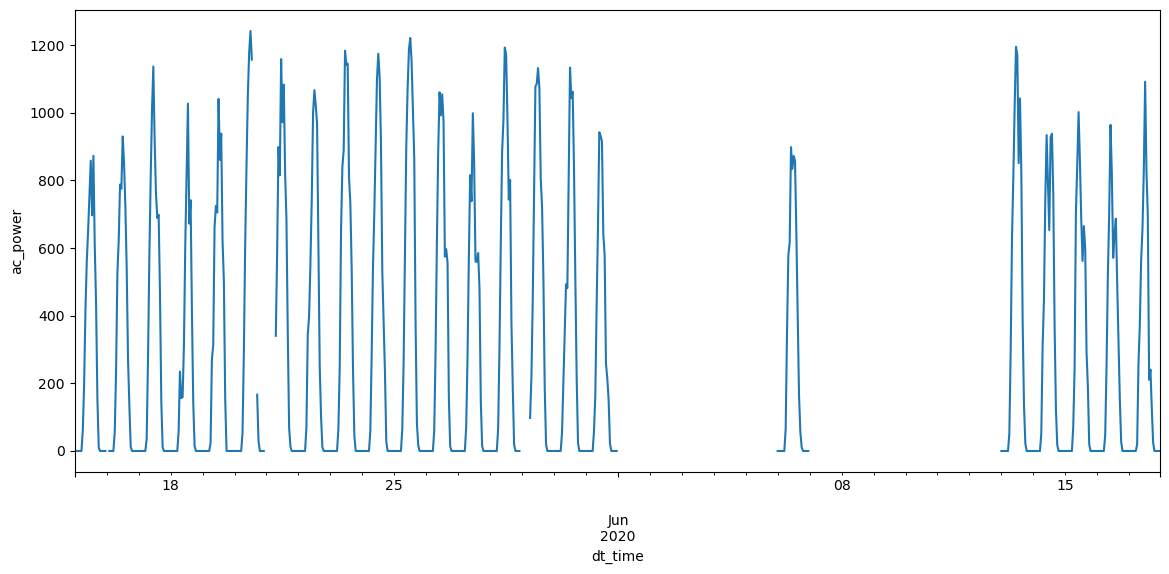

In [20]:
data1.resample('H').mean().ac_power.plot(figsize=(14,6),ylabel='ac_power')

In [21]:
dates=data1.index
hours=[date.hour for date in dates]
data1['hour']=hours

data1

,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,amb_temp,mod_temp,irrad,temp_difference,hour
dt_time,,,,,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,-2.326809,0
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,-2.326809,0
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,-2.326809,0
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,-2.326809,0
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,-2.326809,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,-1.481315,23
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,-1.481315,23
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,-1.481315,23


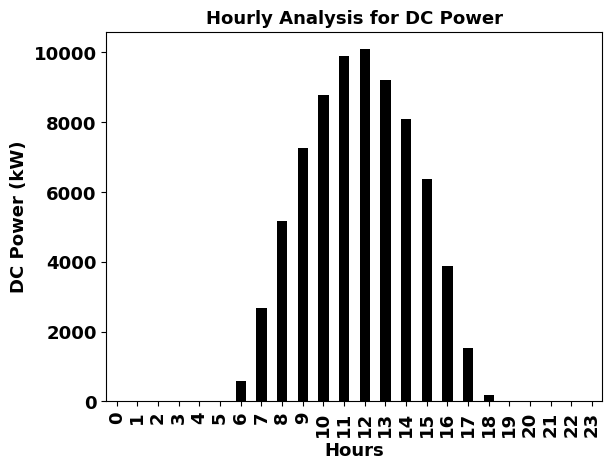

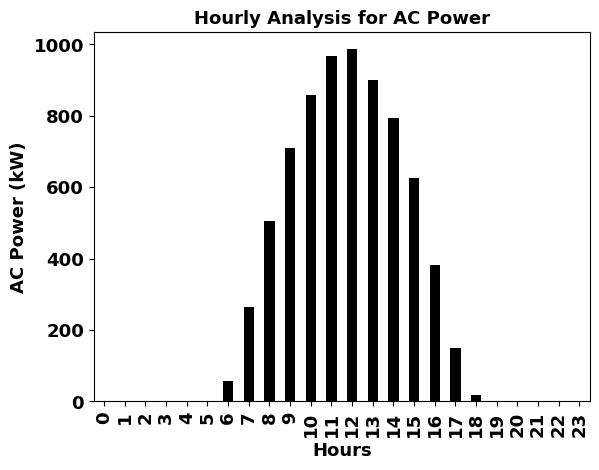

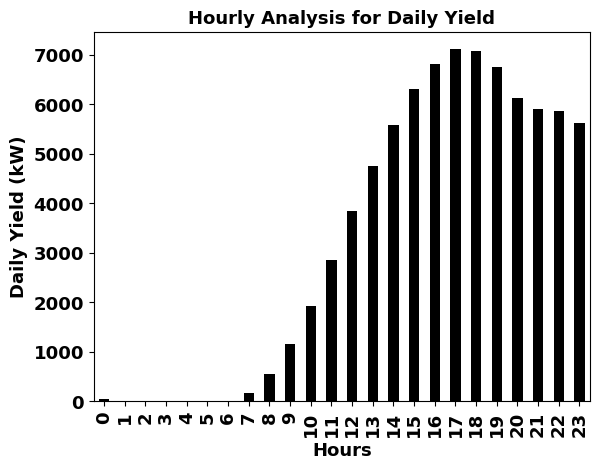

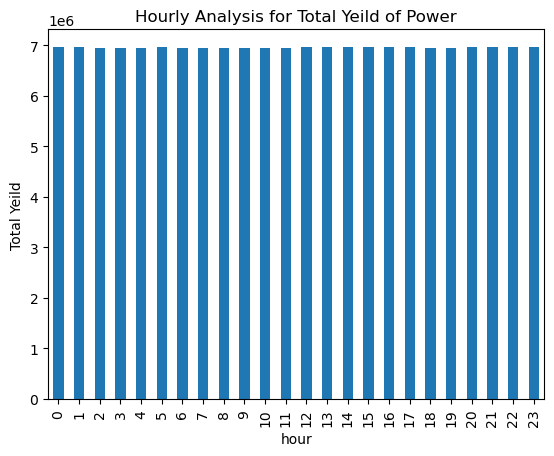

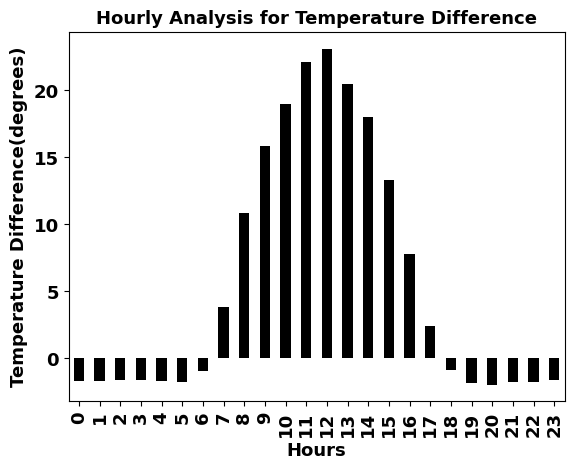

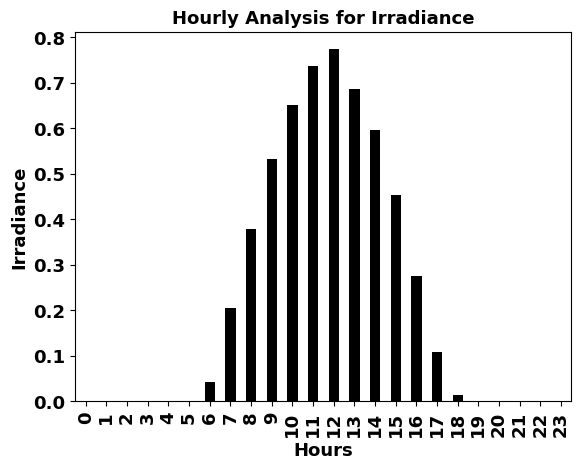

In [22]:
data1.groupby('hour').dc_power.mean().plot(kind='bar',color='black')
plt.title('Hourly Analysis for DC Power',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('DC Power (kW)', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

data1.groupby('hour').ac_power.mean().plot(kind='bar',color='black')
plt.title('Hourly Analysis for AC Power',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('AC Power (kW)', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

data1.groupby('hour').daily_yield.mean().plot(kind='bar',color='black')
plt.title('Hourly Analysis for Daily Yield',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('Daily Yield (kW)', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

data1.groupby('hour').total_yield.mean().plot(kind='bar',ylabel='Total Yeild')
plt.title('Hourly Analysis for Total Yeild of Power')
plt.show()

data1.groupby('hour').temp_difference.mean().plot(kind='bar',color='black')
plt.title('Hourly Analysis for Temperature Difference',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('Temperature Difference(degrees)', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

data1.groupby('hour').irrad.mean().plot(kind='bar',color='black')
plt.title('Hourly Analysis for Irradiance',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('Irradiance', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()


AC Power and DC Power is produced for 12 hours i.e from 6:00 AM to 6:00 PM. 

Daily yield also increases after 6:00 AM
Total Yield is constant throughout the plant.

Temperature difference is negative for before 6:00 AM and after the plant geneartes no output.
As the irradiance increases the temp difference also increases and becomes maximum at 12:00 PM. 

## Monthly

In [23]:
dates=data1.index
months=[date.month for date in dates]
data1['month']=months

data1

,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,amb_temp,mod_temp,irrad,temp_difference,hour,month
dt_time,,,,,,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,-2.326809,0,5
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,-2.326809,0,5
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,-2.326809,0,5
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,-2.326809,0,5
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,-2.326809,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,-1.481315,23,6
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,-1.481315,23,6
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,-1.481315,23,6


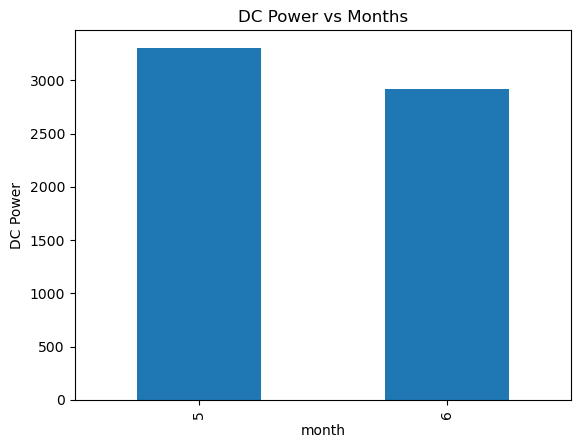

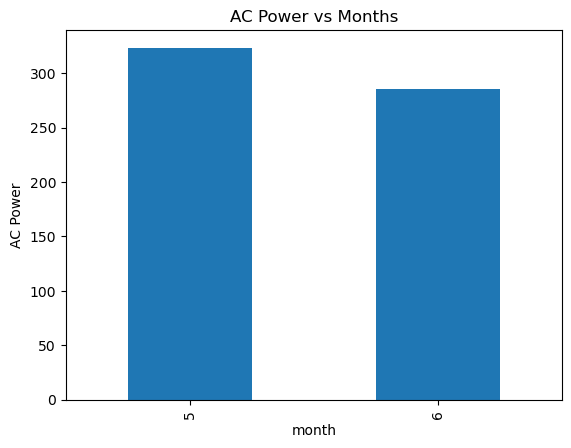

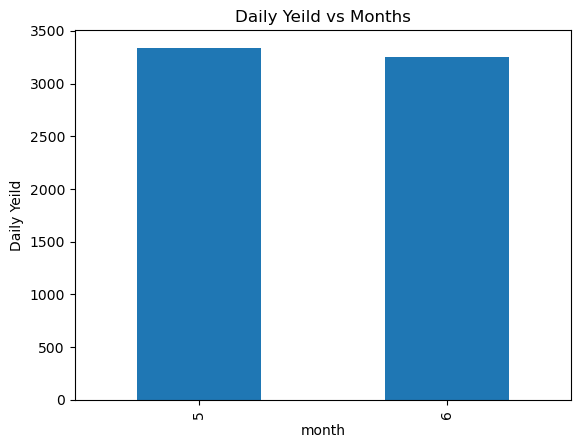

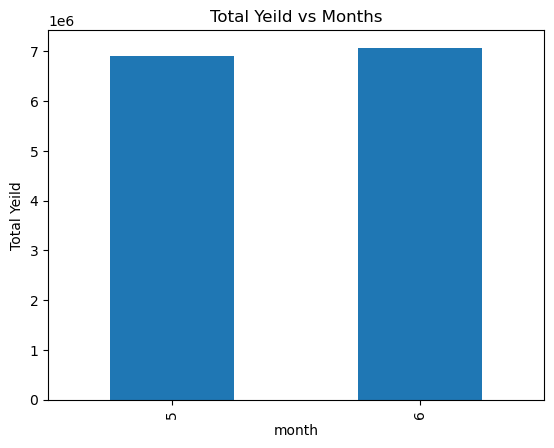

In [24]:
data1.groupby('month').dc_power.mean().plot(kind='bar',ylabel='DC Power')
plt.title('DC Power vs Months')
plt.show()

data1.groupby('month').ac_power.mean().plot(kind='bar',ylabel='AC Power')
plt.title('AC Power vs Months')
plt.show()

data1.groupby('month').daily_yield.mean().plot(kind='bar',ylabel='Daily Yeild')
plt.title('Daily Yeild vs Months')
plt.show()

data1.groupby('month').total_yield.mean().plot(kind='bar',ylabel='Total Yeild')
plt.title('Total Yeild vs Months')
plt.show()

In [25]:
dates=data1.index
months=[date.week for date in dates]
data1['week']=months

data1

,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,amb_temp,mod_temp,irrad,temp_difference,hour,month,week
dt_time,,,,,,,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,-2.326809,0,5,20
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,-2.326809,0,5,20
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,-2.326809,0,5,20
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,-2.326809,0,5,20
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,-2.326809,0,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,-1.481315,23,6,25
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,-1.481315,23,6,25
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,-1.481315,23,6,25


## Weekly

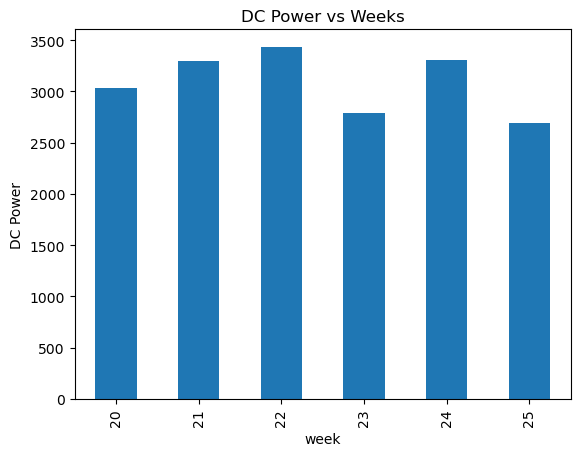

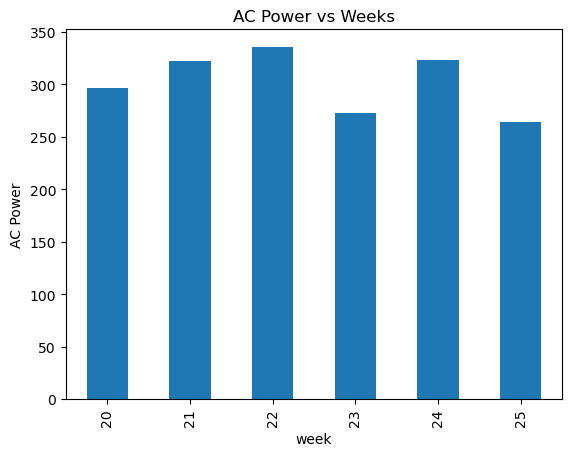

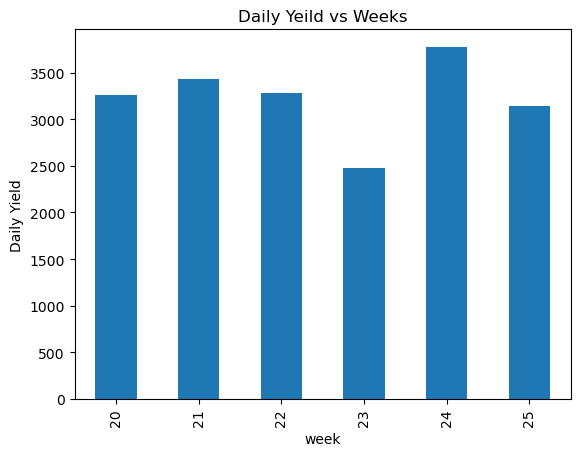

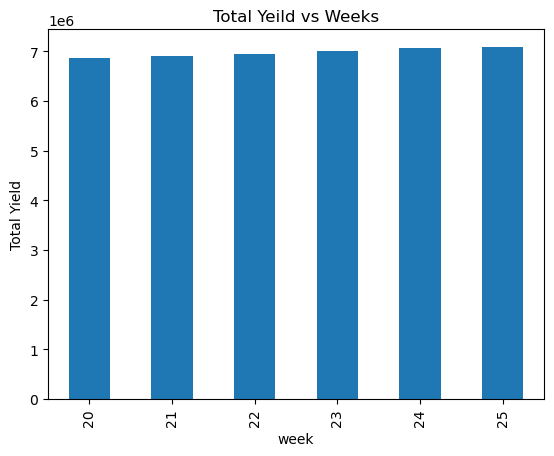

In [26]:
data1.groupby('week').dc_power.mean().plot(kind='bar',ylabel='DC Power')
plt.title('DC Power vs Weeks')
plt.show()

data1.groupby('week').ac_power.mean().plot(kind='bar',ylabel='AC Power')
plt.title('AC Power vs Weeks')
plt.show()

data1.groupby('week').daily_yield.mean().plot(kind='bar',ylabel='Daily Yield')
plt.title('Daily Yeild vs Weeks')
plt.show()

data1.groupby('week').total_yield.mean().plot(kind='bar',ylabel='Total Yield')
plt.title('Total Yeild vs Weeks')
plt.show()

## Outliers

In [27]:
data1_outlier=data1[data1.ac_power>0]
data1_outlier

,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,amb_temp,mod_temp,irrad,temp_difference,hour,month,week
dt_time,,,,,,,,,,,,,
2020-05-15 06:00:00,4135001,1BY6WEcLGh8j5v7,37.142857,3.585714,0.000000,6259559.000,24.088446,22.206757,0.005887,-1.881689,6,5,20
2020-05-15 06:00:00,4135001,1IF53ai7Xc0U56Y,53.500000,5.162500,0.000000,6183645.000,24.088446,22.206757,0.005887,-1.881689,6,5,20
2020-05-15 06:00:00,4135001,3PZuoBAID5Wc2HD,58.000000,5.585714,0.000000,6987759.000,24.088446,22.206757,0.005887,-1.881689,6,5,20
2020-05-15 06:00:00,4135001,7JYdWkrLSPkdwr4,58.428571,5.628571,0.000000,7602960.000,24.088446,22.206757,0.005887,-1.881689,6,5,20
2020-05-15 06:00:00,4135001,McdE0feGgRqW7Ca,54.375000,5.250000,0.000000,7158964.000,24.088446,22.206757,0.005887,-1.881689,6,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 18:30:00,4135001,uHbuxQJl8lW7ozc,79.000000,7.614286,5966.142857,7287001.143,23.840239,22.968658,0.007007,-0.871580,18,6,25
2020-06-17 18:30:00,4135001,wCURE6d3bPkepu2,75.714286,7.300000,5882.714286,7028600.714,23.840239,22.968658,0.007007,-0.871580,18,6,25
2020-06-17 18:30:00,4135001,z9Y9gH1T5YWrNuG,77.428571,7.471429,5818.428571,7251203.429,23.840239,22.968658,0.007007,-0.871580,18,6,25


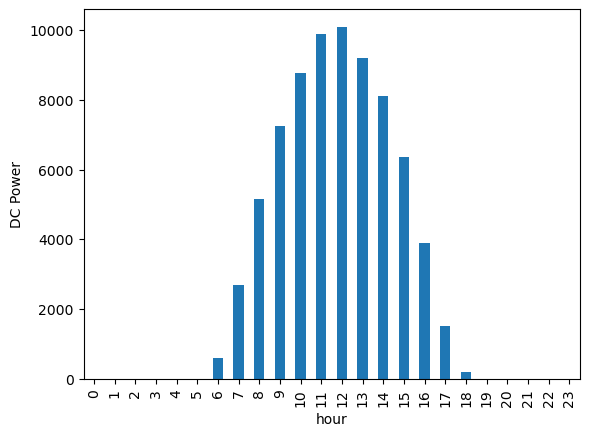

In [28]:
data1.groupby('hour').dc_power.mean().plot(kind='bar',ylabel='DC Power')
plt.show()

Forming dummy variable for month feature

In [29]:
data1= pd.get_dummies(data1, prefix='Month', prefix_sep='.', 
                            columns=['month'])
data1.head()

,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,amb_temp,mod_temp,irrad,temp_difference,hour,week,Month.5,Month.6
dt_time,,,,,,,,,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,-2.326809,0,20,1,0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,-2.326809,0,20,1,0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,-2.326809,0,20,1,0
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,-2.326809,0,20,1,0
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,-2.326809,0,20,1,0


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45680 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   plant_id_x       45680 non-null  int64  
 1   source_key_x     45680 non-null  object 
 2   dc_power         45680 non-null  float64
 3   ac_power         45680 non-null  float64
 4   daily_yield      45680 non-null  float64
 5   total_yield      45680 non-null  float64
 6   amb_temp         45680 non-null  float64
 7   mod_temp         45680 non-null  float64
 8   irrad            45680 non-null  float64
 9   temp_difference  45680 non-null  float64
 10  hour             45680 non-null  int64  
 11  week             45680 non-null  int64  
 12  Month.5          45680 non-null  uint8  
 13  Month.6          45680 non-null  uint8  
dtypes: float64(8), int64(3), object(1), uint8(2)
memory usage: 4.6+ MB


<AxesSubplot:xlabel='temp_difference'>

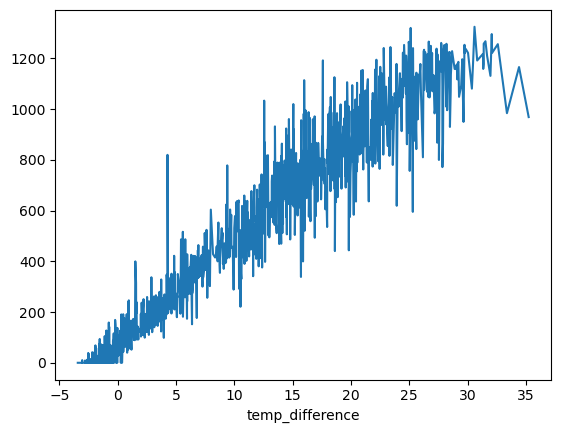

In [31]:
data1.groupby('temp_difference').mean().ac_power.plot()

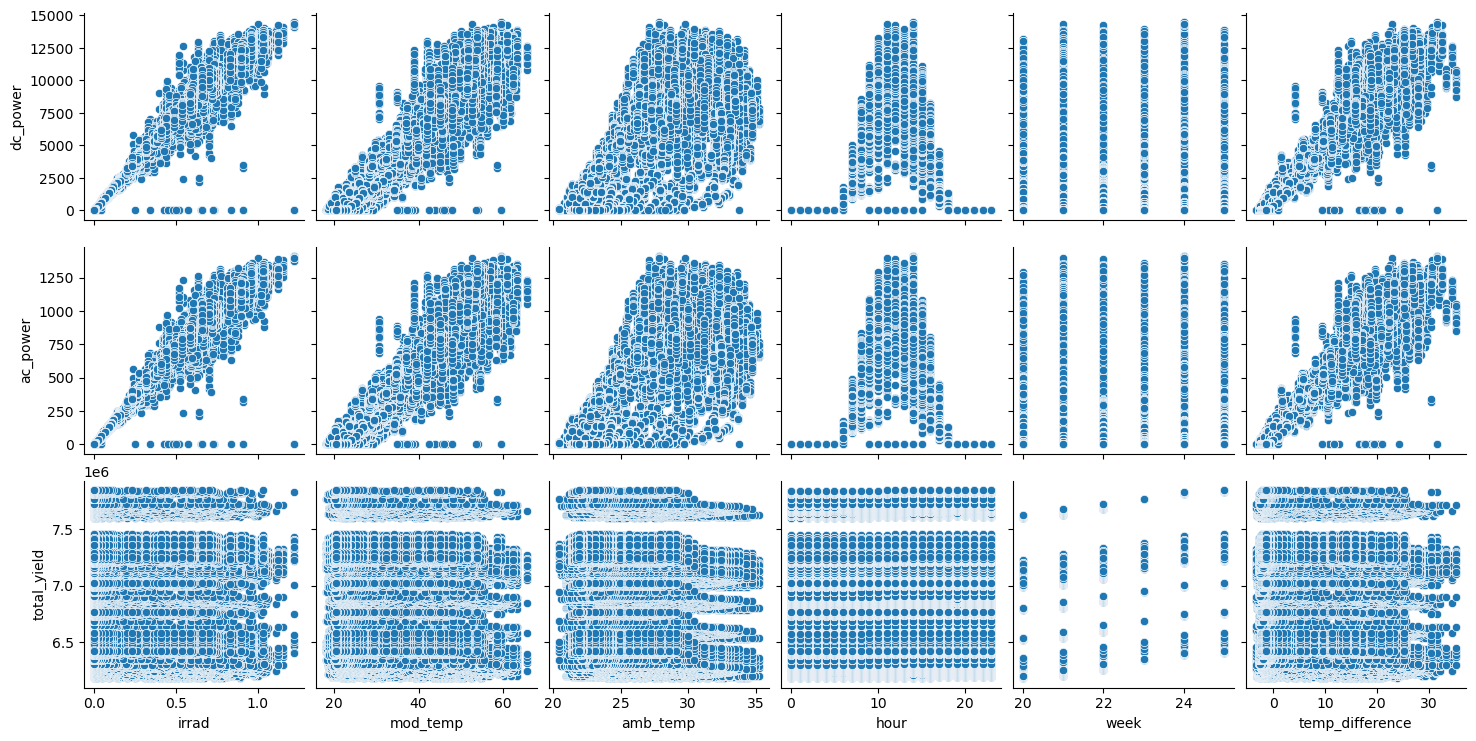

In [32]:
sns.pairplot(
    data1,
    x_vars=['irrad','mod_temp','amb_temp','hour','week','temp_difference'],
    y_vars= ['dc_power','ac_power','total_yield']
)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(data1.drop(columns=['plant_id_x',	'source_key_x','ac_power','dc_power']))
X=pd.DataFrame(data=X,columns=data1.drop(columns=['plant_id_x',	'source_key_x','ac_power','dc_power']).columns)
Y=data1['dc_power']


## Multicolinearity

In [34]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['daily_yield', 'hour'],
  ['amb_temp', 'mod_temp'],
  ['amb_temp', 'irrad'],
  ['amb_temp', 'temp_difference'],
  ['mod_temp', 'amb_temp'],
  ['mod_temp', 'irrad'],
  ['mod_temp', 'temp_difference'],
  ['irrad', 'amb_temp'],
  ['irrad', 'mod_temp'],
  ['irrad', 'temp_difference'],
  ['temp_difference', 'amb_temp'],
  ['temp_difference', 'mod_temp'],
  ['temp_difference', 'irrad'],
  ['hour', 'daily_yield'],
  ['week', 'Month.6'],
  ['Month.6', 'week']],
 16)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

c:\Users\pandy\Anaconda 3\envs\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


daily_yield         4.360800
total_yield         1.034772
amb_temp                 inf
mod_temp                 inf
irrad              25.257535
temp_difference          inf
hour                3.216423
week                4.593079
Month.5                  inf
Month.6                  inf
dtype: float64

In [36]:
VIF[VIF==VIF.max()].index[0]

'amb_temp'

In [37]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [38]:
MC_remover(X)

amb_temp has been removed


,daily_yield,total_yield,mod_temp,irrad,temp_difference,hour,week,Month.5,Month.6
0,-1.049771,-1.671599,-0.713740,-0.773175,-0.843431,-1.701156,-1.332474,0.616085,-0.616085
1,-1.049771,-1.853545,-0.713740,-0.773175,-0.843431,-1.701156,-1.332474,0.616085,-0.616085
2,-1.049771,0.073704,-0.713740,-0.773175,-0.843431,-1.701156,-1.332474,0.616085,-0.616085
3,-1.049771,1.548179,-0.713740,-0.773175,-0.843431,-1.701156,-1.332474,0.616085,-0.616085
4,-1.049771,0.484038,-0.713740,-0.773175,-0.843431,-1.701156,-1.332474,0.616085,-0.616085
...,...,...,...,...,...,...,...,...,...
45675,0.840874,0.790911,-0.905976,-0.773175,-0.757385,1.665941,1.854435,-1.623154,1.623154
45676,0.581255,0.171592,-0.905976,-0.773175,-0.757385,1.665941,1.854435,-1.623154,1.623154
45677,0.793980,0.705113,-0.905976,-0.773175,-0.757385,1.665941,1.854435,-1.623154,1.623154
45678,0.793346,-0.895512,-0.905976,-0.773175,-0.757385,1.665941,1.854435,-1.623154,1.623154


#**SVM Model** 

In [39]:
from sklearn.model_selection import train_test_split as tts, cross_val_score
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.3,random_state=42)

In [40]:
x_train

,daily_yield,total_yield,amb_temp,mod_temp,irrad,temp_difference,hour,week,Month.5,Month.6
36294,0.551409,-0.518099,1.029279,1.573529,2.187353,1.651330,0.055591,1.217053,-1.623154,1.623154
4107,-1.049771,0.411107,-0.691412,-0.832412,-0.773175,-0.820396,-1.408365,-1.332474,0.616085,-0.616085
28142,0.982466,0.796780,1.697095,1.723074,1.222484,1.601962,0.348382,-0.057710,0.616085,-0.616085
17757,-1.025012,-1.696867,-0.421898,-0.484577,-0.271448,-0.470559,-0.676387,-0.695092,0.616085,-0.616085
11895,-0.757398,-1.440549,0.075650,1.115392,1.284468,1.407237,-0.383596,-0.695092,0.616085,-0.616085
...,...,...,...,...,...,...,...,...,...,...
11284,0.727864,0.234610,1.576829,1.930522,2.173032,1.912312,0.201986,-0.695092,0.616085,-0.616085
44732,0.160008,-0.900302,0.748584,0.921406,0.824822,0.914165,0.201986,1.854435,-1.623154,1.623154
38158,-0.502073,0.612224,0.122931,0.901798,1.138711,1.115399,-0.237200,1.217053,-1.623154,1.623154
860,-0.681829,-1.668816,0.763395,1.635485,1.416335,1.827253,-0.237200,-1.332474,0.616085,-0.616085


In [41]:
from sklearn.svm import SVR
SVM_regressor=SVR()
#r2_cv=cross_val_score(SVM_regressor, x_train,y_train,cv=5)
#print(r2_cv)

In [42]:
SVM_regressor.fit(x_train,y_train)
y_pred=SVM_regressor.predict(x_test)

print(f'Train R2: {SVM_regressor.score(x_train,y_train)}')
print(f'Train R2: {SVM_regressor.score(x_test,y_test)}')

from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'Test MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'Test MSE: {mean_squared_error(y_test,y_pred)}')


Train R2: 0.7262095770086521
Train R2: 0.7235028206977572
Test MAE: 1303.0906764067631
Test MSE: 4612046.237530523


Text(0, 0.5, 'Predicted Active Power')

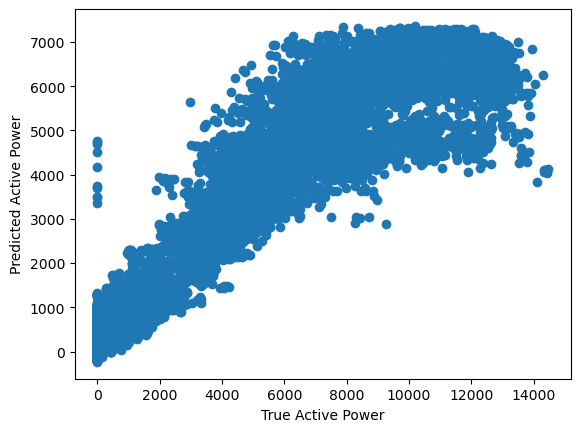

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Active Power')
plt.ylabel('Predicted Active Power')

In [51]:
data = pd.DataFrame(list(zip(y_pred, y_test)),
               columns =['Prediction', 'Actual'])

In [52]:
import pandas as pd

# Assuming you have already created the 'data' DataFrame

# Specify the file path where you want to save the CSV file
file_path = 'wind_predictions.csv'

# Use the to_csv method to save the DataFrame to a CSV file
data.to_csv(file_path, index=False)

# 'index=False' is used to prevent writing the index column to the CSV file


In [49]:
fghh

NameError: name 'fghh' is not defined

In [ ]:
def whale_optimization_algorithm(obj_func, data, bounds, max_iter, dim, pop_size):
    # Initialize the population of whales (solution candidates)
    pop = np.random.uniform(bounds[0], bounds[1], (pop_size, dim))
    # Initialize the population fitness values
    fitness = np.array([obj_func(whale, data) for whale in pop])
    best_whale = pop[np.argmin(fitness)]
    best_fitness = np.min(fitness)

    for i in range(max_iter):
        # Update the a and c values for this iteration
        a = 2 - i*(2/max_iter)
        c = 2*np.exp(-4*i/max_iter)
        for j in range(pop_size):
            # Update the position of the current whale
            r1 = np.random.rand()
            r2 = np.random.rand()
            A = 2*a*r1 - a
            C = 2*r2
            b = 1
            l = (-1)**np.random.randint(1,3)
            p = np.random.rand()
            if p < 0.5:
                if np.abs(A) < 1:
                    b = 1
                else:
                    b = 0
            else:
                if np.abs(A) < 1:
                    b = 0
                else:
                    b = 1
            D_x = abs(C*best_whale - pop[j])
            pop[j] = best_whale - A*D_x*l
            # Ensure that the new position is within the bounds of the search space
            pop[j] = np.clip(pop[j], bounds[0], bounds[1])
            # Update the fitness value for the current whale
            fitness[j] = obj_func(pop[j], data)
        # Update the best whale and best fitness values
        best_fitness_idx = np.argmin(fitness)
        if fitness[best_fitness_idx] < best_fitness:
            best_fitness = fitness[best_fitness_idx]
            best_whale = pop[best_fitness_idx]
    
    # Calculate the predicted values using the best solution found by the optimization
    y_pred = np.dot(data.iloc[:, :-1], best_whale)
    # Save the predicted values to a new column in the DataFrame
    data['new_y_pred'] = y_pred

    return best_whale, best_fitness

In [ ]:
import numpy as np
import pandas as pd

# Define the objective function
def obj_func(x, data):
    # Calculate the sum of squared errors between the predicted values and the actual values
    y_pred = np.dot(data.iloc[:, :-1], x)
    y_true = data.iloc[:, -1]
    return np.sum((y_pred - y_true)**2)

# Set the optimization parameters
bounds = (-10, 10)  # Bounds for each dimension
max_iter = 100  # Maximum number of iterations
dim = data.shape[1] - 1  # Number of dimensions (number of features in the dataset)
pop_size = 250  # Population size

# Run the optimization
best_whale, best_fitness = whale_optimization_algorithm(obj_func, data, bounds, max_iter, dim, pop_size)

# Print the results
print(f"Best whale: {best_whale}")
print(f"Best fitness: {best_fitness}")

In [ ]:
data

In [ ]:
plt.scatter(data['Actual'],data['new_y_pred'])
plt.xlabel('True Active Power')
plt.ylabel('Predicted Active Power')